In [ ]:
import tensorflow as tf

from tensorflow.keras import layers
import tensorflow_datasets as tfds


from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import json

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D,Dropout
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

import  matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import re
import os
import time
from glob import glob
from PIL import Image
import pickle

In [ ]:
def make_model():
  incep = tf.keras.applications.InceptionV3()
  x = tf.keras.layers.Flatten()(incep.output)
  x = Dense(1024, activation='relu')(x) 
  x = Dropout(0.1)(x)
  x = Dense(256, activation='relu')(x) 
  x = Dense(20, activation='softmax')(x)    # object class
   # object class
    # object class
  model = tf.keras.Model(incep.input, x)
  # model.compile(loss='custom_loss, optimizer=SGD(learning_rate = 0.01, momentum=0.9))
  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  return model


In [ ]:
model = make_model()

In [8]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 149, 149, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 149, 149, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [ ]:
artist_name = ['Leonardo_da_Vinci',
 'Albrecht_Dürer',
 'Rembrandt',
 'Mikhail_Vrubel',
 'Vincent_van_Gogh',
 'Henri_Matisse',
 'Pablo_Picasso',
 'Peter_Paul_Rubens',
 'Amedeo_Modigliani',
 'Pierre-Auguste_Renoir',
 'Marc_Chagall',
 'Sandro_Botticelli',
 'Paul_Klee',
 'Andy_Warhol',
 'Paul_Gauguin',
 'Alfred_Sisley',
 'Titian',
 'Rene_Magritte',
 'Francisco_Goya',
 'Edgar_Degas']

Adding images path and make a label for each images. 

In [ ]:
from os import listdir

path = []
ID = []


target_directory = '/all_images_of_all_artist/'
i = 0
for name in art:
  for file_name in listdir(target_directory+name):
    path.append(target_directory+name+'/'+ file_name)
    ID.append(i)
  i += 1 


defind load function to decond images to shape (299, 299, 3)

In [ ]:
def load(img_path):
  
  image = tf.io.read_file(img_path)
  
  image = tf.image.decode_png(image, channels= 3)


  image = tf.cast(image, dtype=tf.float32)
  
  image = (image / 255.0) 

  image = tf.image.resize(image, size=(299,299))
  
  return image.numpy()

In [ ]:
load all images using images path from path list

In [ ]:
images = []
i= 0
for p in path:
  images.append(load(p))
  i += 1

In [22]:
len(ID), len(images),len(path)

(5860, 5860, 5860)

In [23]:
x_train = np.array(images)
x_train.shape

(5860, 299, 299, 3)

In [24]:
y_train = np.array(ID)
y_train.shape

(5860,)

In [39]:
model.fit(x_train,y_train,epochs=100)

Train on 5860 samples
Epoch 1/100
5860/5860 [==============================] - 46s 8ms/sample - loss: 0.1152 - accuracy: 0.9647
Epoch 2/100
5860/5860 [==============================] - 46s 8ms/sample - loss: 0.0981 - accuracy: 0.9712
Epoch 3/100
5860/5860 [==============================] - 46s 8ms/sample - loss: 0.1000 - accuracy: 0.9720
Epoch 4/100
5860/5860 [==============================] - 46s 8ms/sample - loss: 0.0887 - accuracy: 0.9742
Epoch 5/100
5860/5860 [==============================] - 46s 8ms/sample - loss: 0.0899 - accuracy: 0.9751
Epoch 6/100
5860/5860 [==============================] - 46s 8ms/sample - loss: 0.0962 - accuracy: 0.9717
Epoch 7/100
5860/5860 [==============================] - 46s 8ms/sample - loss: 0.1031 - accuracy: 0.9681
Epoch 8/100
5860/5860 [==============================] - 46s 8ms/sample - loss: 0.0961 - accuracy: 0.9718
Epoch 9/100
5860/5860 [==============================] - 46s 8ms/sample - loss: 0.2171 - accuracy: 0.9353
Epoch 10/100
5860/5860 [

# Test

In [ ]:
def save_model():
  json_config = model.to_json()
  with open('//model_config.json', 'w') as json_file:
      json_file.write(json_config)
    
  # Save weights to disk
  model.save_weights('/model_weights.h5')

In [ ]:
save_model()

In [ ]:
with open('/model_config.json') as json_file:
    json_config = json_file.read()
   
model = tf.keras.models.model_from_json(json_config)
model.load_weights('/model_weights.h5')

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
image_path = '/content/Leonardo_da_Vinci_121.jpg'

In [ ]:
def prediction_artist(image_path , model):
  img = load(image_path)

  predictions = model.predict(img[tf.newaxis,...])

  artist_name = art[np.argmax(predictions)]

  return artist_name 

Leonardo_da_Vinci


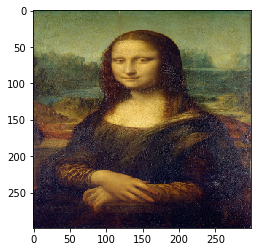

In [45]:
img = load(image_path)
plt.imshow(img)
print(prediction_artist(image_path, model))